In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [36]:
train = pd.read_csv('../input/train.csv')

In [37]:
train.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 143 columns):
Id                 object
v2a1               float64
hacdor             int64
rooms              int64
hacapo             int64
v14a               int64
refrig             int64
v18q               int64
v18q1              float64
r4h1               int64
r4h2               int64
r4h3               int64
r4m1               int64
r4m2               int64
r4m3               int64
r4t1               int64
r4t2               int64
r4t3               int64
tamhog             int64
tamviv             int64
escolari           int64
rez_esc            float64
hhsize             int64
paredblolad        int64
paredzocalo        int64
paredpreb          int64
pareddes           int64
paredmad           int64
paredzinc          int64
paredfibras        int64
paredother         int64
pisomoscer         int64
pisocemento        int64
pisoother          int64
pisonatur          int64
pisonotien

In [38]:
train.info

<bound method DataFrame.info of                 Id      v2a1  hacdor   ...     SQBmeaned  agesq  Target
0     ID_279628684  190000.0       0   ...    100.000000   1849       4
1     ID_f29eb3ddd  135000.0       0   ...    144.000000   4489       4
2     ID_68de51c94       NaN       0   ...    121.000000   8464       4
3     ID_d671db89c  180000.0       0   ...    121.000000    289       4
4     ID_d56d6f5f5  180000.0       0   ...    121.000000   1369       4
5     ID_ec05b1a7b  180000.0       0   ...    121.000000   1444       4
6     ID_e9e0c1100  180000.0       0   ...    121.000000     64       4
7     ID_3e04e571e  130000.0       1   ...    100.000000     49       4
8     ID_1284f8aad  130000.0       1   ...    100.000000    900       4
9     ID_51f52fdd2  130000.0       1   ...    100.000000    784       4
10    ID_db44f5c59  130000.0       1   ...    100.000000    121       4
11    ID_de822510c  100000.0       0   ...    529.000000    324       4
12    ID_d94071d7c  100000.0    

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [40]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,...,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707,0.062363,0.082767,0.093858,0.080674,0.714555,0.285445,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202,1.772216,1.876428,4.730877,0.946550,1.772216,0.491107,0.267782,0.390756,0.092235,0.319788,0.113621,0.038248,0.038248,0.461361,0.416196,0.030675,0.032332,0.127120,0.248156,0.170391,0.131805,0.055942,0.046827,...,4.167694,0.341384,0.376140,0.405683,0.388653,0.316233,0.132568,0.123892,0.346790,0.123071,0.944507,0.819946,0.48578,0.300754,0.385573,0.129485,0.274750,0.302827,0.451251,0.155199,1.483249,0.492286,0.290036,0.241826,0.275543,0.291646,0.272348,0.451650,0.451650,21.612261,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000

In [41]:
train.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,2,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,1,0,0,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,8,4,64,16,121,4,1.777778,1.0,121.0,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,10.0,1,0,0,0,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,7,0,49,16,81,4,16.000000,1.0,100.0,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,9,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,10.0,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,81,900,16,81,4,16.000000,1.0,100.0,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,1,1,2,1,3,2,2,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,10.0,0,0,0,0,1,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,28,121,784,16,81,4,16.000000,1.0,100.0,784,4


In [42]:
train.columns[train.isna().sum()!=0]

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype='object')

In [43]:
train['rez_esc']=train['rez_esc'].fillna(0)
train = train.fillna(train.mean())
#Filling null or NaN values with either 0 or mean value to clean data

In [44]:
train = train.drop(['edjefe','edjefa','dependency','v2a1','v18q1','rez_esc','meaneduc','SQBmeaned'], axis = 1)
#Dropping object variables as the models we will use will only pick up numeric values

In [45]:
#train = train.drop()
train.info(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 135 columns):
Id                 object
hacdor             int64
rooms              int64
hacapo             int64
v14a               int64
refrig             int64
v18q               int64
r4h1               int64
r4h2               int64
r4h3               int64
r4m1               int64
r4m2               int64
r4m3               int64
r4t1               int64
r4t2               int64
r4t3               int64
tamhog             int64
tamviv             int64
escolari           int64
hhsize             int64
paredblolad        int64
paredzocalo        int64
paredpreb          int64
pareddes           int64
paredmad           int64
paredzinc          int64
paredfibras        int64
paredother         int64
pisomoscer         int64
pisocemento        int64
pisoother          int64
pisonatur          int64
pisonotiene        int64
pisomadera         int64
techozinc          int64
techoentrepiso  

In [46]:
train = train.drop(['Id'], axis = 1)

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

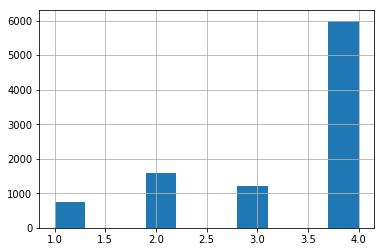

In [48]:
train['Target'].hist()
#Creating a histogram to visualize target data

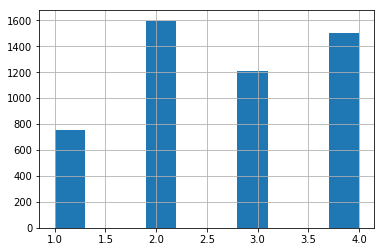

In [49]:
train_undersampled = train.drop(train.query('Target == 4').sample(frac=.75).index)
train_undersampled['Target'].hist()

In [50]:
#Random Forest
X=train.drop(['idhogar', 'Target'], axis=1)
y=train['Target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
clf = RandomForestClassifier()
params={'n_estimators': list(range(40,61, 1))}
gs = GridSearchCV(clf, params, cv=5)
#Implementing gridsearch and random forest

In [53]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
gs_pred =gs.predict(X_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gs_pred))

              precision    recall  f1-score   support

           1       0.97      0.78      0.87       150
           2       0.93      0.80      0.86       288
           3       0.94      0.65      0.77       243
           4       0.89      1.00      0.94      1231

   micro avg       0.91      0.91      0.91      1912
   macro avg       0.94      0.81      0.86      1912
weighted avg       0.91      0.91      0.90      1912



In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, gs_pred))

[[ 117    9    0   24]
 [   2  231    9   46]
 [   1    6  159   77]
 [   0    2    1 1228]]


In [57]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)
#Finding the best parameters, scores, and estimators for the model. Implementing the grid search method to find f1 values and best estimator.

{'n_estimators': 60}
0.8714192282537606
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [74]:
test = pd.read_csv('../input/test.csv')

In [75]:
test = test.fillna(test.mean)
test.info(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 142 columns):
Id                 object
v2a1               object
hacdor             int64
rooms              int64
hacapo             int64
v14a               int64
refrig             int64
v18q               int64
v18q1              object
r4h1               int64
r4h2               int64
r4h3               int64
r4m1               int64
r4m2               int64
r4m3               int64
r4t1               int64
r4t2               int64
r4t3               int64
tamhog             int64
tamviv             int64
escolari           int64
rez_esc            object
hhsize             int64
paredblolad        int64
paredzocalo        int64
paredpreb          int64
pareddes           int64
paredmad           int64
paredzinc          int64
paredfibras        int64
paredother         int64
pisomoscer         int64
pisocemento        int64
pisoother          int64
pisonatur          int64
pisonotiene

In [76]:
ids=test['Id']
test.drop(['Id', 'idhogar'], axis=1, inplace=True)
#Got rid of Id and idhogar variable as it was an object

In [77]:
test = test.drop(['edjefe','edjefa','dependency','v2a1','v18q1','rez_esc','meaneduc','SQBmeaned'], axis=1)
#Proceeded further with getting rid of object variables for clear model estimators and prediction.

In [70]:
#Accidentally re-ran the test.drop and so variables are already gone, but is showing an error.
#test_preds = gs.predict(test)
test.info(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 132 columns):
hacdor             int64
rooms              int64
hacapo             int64
v14a               int64
refrig             int64
v18q               int64
r4h1               int64
r4h2               int64
r4h3               int64
r4m1               int64
r4m2               int64
r4m3               int64
r4t1               int64
r4t2               int64
r4t3               int64
tamhog             int64
tamviv             int64
escolari           int64
hhsize             int64
paredblolad        int64
paredzocalo        int64
paredpreb          int64
pareddes           int64
paredmad           int64
paredzinc          int64
paredfibras        int64
paredother         int64
pisomoscer         int64
pisocemento        int64
pisoother          int64
pisonatur          int64
pisonotiene        int64
pisomadera         int64
techozinc          int64
techoentrepiso     int64
techocane      

In [78]:
#test = test.drop(['idhogar'], axis=1)
#Dropped float64 values also to leave only int64 values

#Re-ran everything to leave float's in

test_preds = gs.predict(test)

In [79]:
test_preds[:5]

array([4, 4, 4, 4, 4])

In [81]:
#submission = pd.DataFrame({'Id': ids, 'Target': test_preds})
#idt = test['Id']

submission = pd.DataFrame({'Id': ids, 'Target': test_preds})

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
#Using XG Boost
from pylab import rcParams
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os
%matplotlib inline
sns.set(style = 'darkgrid')

In [ ]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='Target', y = 'r4h3',ax = ax, data = train, hue = 'Target' )
ax.set_title('No. of Men in Household', size = 25)

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='Target', y = 'r4m3',ax = ax, data = train, hue = 'Target' )
ax.set_title('No. of Women in Households', size = 25)

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
y = train['Target']
train = train.drop(['Id', 'Target'] ,axis = 1)
train = train.select_dtypes(exclude=['object'])
test = test.drop('Id',axis = 1)
test = test.select_dtypes(exclude=['object'])

In [ ]:
y = y - 1
X_train, X_test, y_train, y_test = train_test_split(train, y, stratify = y, test_size = 0.3, random_state = 666)

In [ ]:
from sklearn.metrics import f1_score
#xgbtrain = xgb.DMatrix(X_train, label=y_train)
#xgbval = xgb.DMatrix(X_test, label=y_test)
#train.info(object)

In [ ]:
def evaluate_macroF1(true_value, predictions):  
    pred_labels = predictions.reshape(len(np.unique(true_value)),-1).argmax(axis=0)
    f1 = f1_score(true_value, pred_labels, average='macro')
    return ('macroF1', f1, True) 
params = {
        "objective" : "multi:softmax",
        "metric" : evaluate_macroF1,
        "n_estimators": 100,
        'max_depth' : 9,
        "learning_rate" : 0.23941,
        'max_delta_step': 2,
        'min_child_weight': 9,
        'subsample': 0.72414,
        "seed": 666,
        'num_class': 4,
        'silent': True
    }
xgbtrain = xgb.DMatrix(X_train, label=y_train)
xgbval = xgb.DMatrix(X_test, label=y_test)


watchlist = [(xgbtrain, 'train'), (xgbval, 'valid')]
evals_result = {}
model = xgb.train(params, xgbtrain, 5000, 
                     watchlist,
                    early_stopping_rounds=150, verbose_eval=100)

In [ ]:
from sklearn.metrics import classification_report
Xgb_test = xgb.DMatrix(X_test)
y_pred = model.predict(Xgb_test, ntree_limit=model.best_ntree_limit)
print(classification_report(y_test, y_pred))